In [28]:
import re

# Wordnet

In [29]:
from nltk.corpus import wordnet

You could call "Wordnet" a lexicon, but it is really much more.

It is often referred to as a *lexical database*, containing large amounts
of information about words, their relationships, and their meanings.

Wordnet contains:

- nouns (including compound nouns / collocations)
- verbs
- adjectives
- adverbs

It does not contain articles, prepositions, determiners, particles, etc. It also doesn't contain separate entries for grammatical variants, but will generally map grammatical variants onto their root forms.

Note that Wordnet and its software are free under a BSD license.

There is a similar database for German, called GermaNet, but it is available only under restrictive, non-free
licenses. It is part of EuroWordNet, which is also only available under restrictive licenses.


# Wordnet Significance and Alternatives

Wordnet was originally created by psychologists.

The word relationships in Wordnet have psychological reality:

- base level words are recognized most quickly ("cat" vs "feline" vs "sabrecat")
- defining properties of categories are processed/accessed more quickly
- deficits in anomia correlate with these kinds of categorizations

Limitations

- no pronunciation (that may make a difference with homophones)
- not a full ontology
- no statistical information (is this usage frequent or infrequent)

# Synsets and Lemmas

In [30]:
wordnet.synsets("cat")

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset("cat-o'-nine-tails.n.01"),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [31]:
wordnet.synsets("cat",wordnet.NOUN)

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset("cat-o'-nine-tails.n.01"),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01')]

Wordnet is organized into *synsets* (synonym sets).

Each synset represents "a set of one or more synonyms that are interchangeable in some context without changing the truth value of the proposition in which they are embedded."

The concept is also used in other contexts in artificial intelligence and knowledge representation.

Each synset has a definition.

In [68]:
for s in wordnet.synsets("cat",wordnet.NOUN):
    print s.name,":",s.definition

cat.n.01 : feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
guy.n.01 : an informal term for a youth or man
cat.n.03 : a spiteful woman gossip
kat.n.01 : the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant
cat-o'-nine-tails.n.01 : a whip with nine knotted cords
caterpillar.n.02 : a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work
big_cat.n.01 : any of several large cats typically able to roar and living in the wild
computerized_tomography.n.01 : a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis


Each synset has a unique identifier.

In [33]:
cat = wordnet.synset("cat.n.01")
cat

Synset('cat.n.01')

As with a dictionary, we may also get definitions:

In [71]:
wordnet.synset("dog.n.01").examples

['the dog barked all night']

Each element in a synset is a *lemma*; that is, it is a specific root word
with a specific meaning, kind of like an entry in a dictionary.

In [34]:
cat.lemmas

[Lemma('cat.n.01.cat'), Lemma('cat.n.01.true_cat')]

In [35]:
cat.lemma_names

['cat', 'true_cat']

Make sure you keep lemmas, synset identifier, words, and synsets apart in your mind.

In [58]:
wordnet.lemma("cat.n.01.cat")

Lemma('cat.n.01.cat')

In [63]:
wordnet.synset("cat.n.01")

Synset('cat.n.01')

In [65]:
wordnet.synsets("cat")

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset("cat-o'-nine-tails.n.01"),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

# Word Relationships

## IS-A Relationships

One of the most important relationships encoded in Wordnet is the "IS-A" relationship.
For example, a cat "is-a" feline.

This operates similar to inheritance in OOP (in fact, OOP is based on these kinds of
relationships in natural language, brought to OOP via AI).

These semantic relationships are defined between synsets and referred to as *hypernyms* and *hyponyms*.

(Note the analogy to *synonyms* and *antonyms*.)

In [75]:
s = [cat]
indent = ""
while s!=[]:
    print indent,s
    s = s[0].hypernyms() # <--- navigate up the hierarchy
    indent += "   "

 [Synset('cat.n.01')]
    [Synset('feline.n.01')]
       [Synset('carnivore.n.01')]
          [Synset('placental.n.01')]
             [Synset('mammal.n.01')]
                [Synset('vertebrate.n.01')]
                   [Synset('chordate.n.01')]
                      [Synset('animal.n.01')]
                         [Synset('organism.n.01')]
                            [Synset('living_thing.n.01')]
                               [Synset('whole.n.02')]
                                  [Synset('object.n.01')]
                                     [Synset('physical_entity.n.01')]
                                        [Synset('entity.n.01')]


In [76]:
s = [cat]
def print_tree(s,indent=""):
    print indent,s
    for e in s.hyponyms(): # <--- navigate down the hierarchy
        print_tree(e,indent+"   ")
print_tree(cat)

 Synset('cat.n.01')
    Synset('domestic_cat.n.01')
       Synset('angora.n.04')
       Synset('tabby.n.01')
       Synset('tiger_cat.n.02')
       Synset('persian_cat.n.01')
       Synset('abyssinian.n.01')
       Synset('tabby.n.02')
       Synset('burmese_cat.n.01')
       Synset('tortoiseshell.n.03')
       Synset('egyptian_cat.n.01')
       Synset('siamese_cat.n.01')
          Synset('blue_point_siamese.n.01')
       Synset('maltese.n.03')
       Synset('manx.n.02')
       Synset('alley_cat.n.01')
       Synset('tom.n.02')
          Synset('gib.n.02')
       Synset('mouser.n.01')
       Synset('kitty.n.04')
    Synset('wildcat.n.03')
       Synset('jungle_cat.n.01')
       Synset('serval.n.01')
       Synset('ocelot.n.01')
       Synset('leopard_cat.n.01')
       Synset('jaguarundi.n.01')
       Synset('margay.n.01')
       Synset('european_wildcat.n.01')
       Synset('cougar.n.01')
       Synset('tiger_cat.n.01')
       Synset('lynx.n.02')
          Synset('common_lynx.n.01')
  

It's useful and easy to display such relationships graphically with `pydot`.

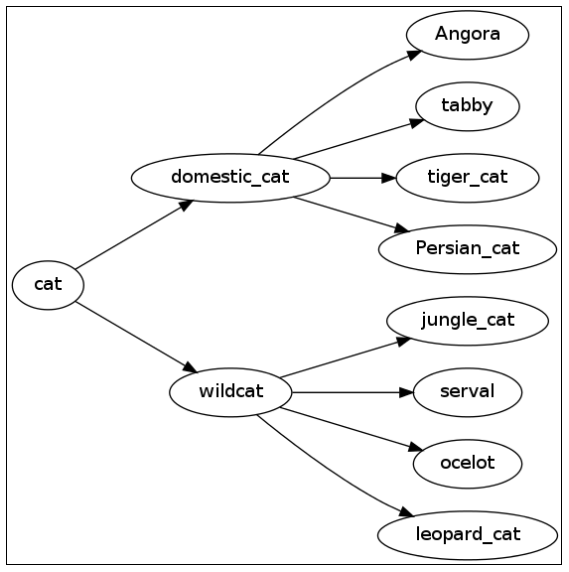

In [38]:
import pydot
graph = pydot.Dot(rankdir="LR")
def add(l):
    hypos = l.hyponyms()[:4]
    for h in hypos:
        graph.add_edge(pydot.Edge(l.lemma_names[0],h.lemma_names[0]))
        add(h)
add(cat)
def show_graph(graph):
    graph.write_png("/tmp/_test.png")
    clf(); figsize(10,10)
    gca().set_xticks([]); gca().set_yticks([])
    imshow(imread("/tmp/_test.png"))
show_graph(graph)

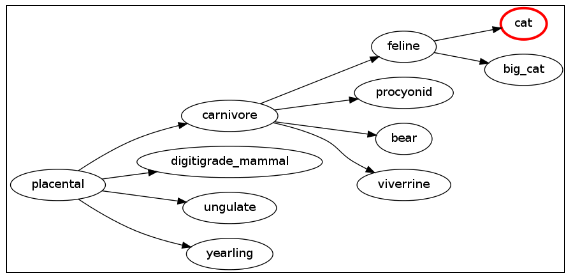

In [39]:
import pydot
graph = pydot.Dot(rankdir="LR")
c = cat
graph.add_node(pydot.Node(c.lemma_names[0],color="red",penwidth="3"))
for i in range(3):
    start = c
    hypers = c.hypernyms()
    if hypers==[]: break
    c = hypers[0]
    hypos = list(set([start]+c.hyponyms()[:3]))
    for h in hypos:
        graph.add_edge(pydot.Edge(c.lemma_names[0],h.lemma_names[0]))
show_graph(graph)

Q: Can we create a German equivalent of Wordnet via the English Wordnet, translation, and statistics?

## HAS-A Relationships

Another kind of relationship is parts/whole relationships, or HAS-A relationships.

These relationships are referred to as *meronyms* and *holonyms* of a word.

In [74]:
for s in wordnet.synsets("tree",wordnet.NOUN):
    print s.name,":",s.definition

tree.n.01 : a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms
tree.n.02 : a figure that branches from a single root
tree.n.03 : English actor and theatrical producer noted for his lavish productions of Shakespeare (1853-1917)


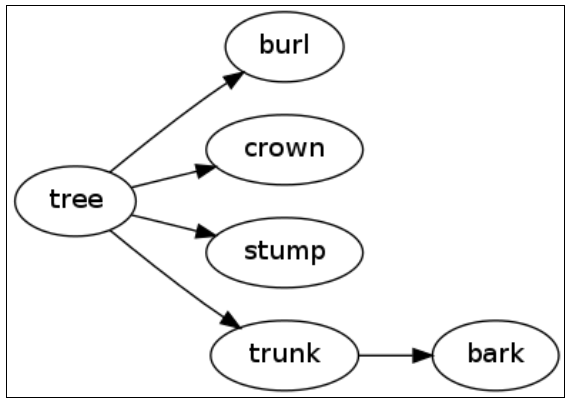

In [42]:
graph = pydot.Dot(rankdir="LR")
def add(l):
    hypos = l.part_meronyms()[:4]
    graph.add_node(pydot.Node(l.lemma_names[0]))
    for h in hypos:
        graph.add_edge(pydot.Edge(l.lemma_names[0],h.lemma_names[0]))
        add(h)
add(wordnet.synset("tree.n.01"))
show_graph(graph)

In [43]:
for s in wordnet.synsets("dot",wordnet.NOUN):
    print s.lemmas[0],s.definition

Lemma('point.n.09.point') a very small circular shape
Lemma('department_of_transportation.n.01.Department_of_Transportation') the United States federal department that institutes and coordinates national transportation programs; created in 1966
Lemma('dot.n.03.dot') the shorter of the two telegraphic signals used in Morse code
Lemma('acid.n.02.acid') street name for lysergic acid diethylamide


In [44]:
wordnet.synset("finger.n.01").part_holonyms()

[Synset('hand.n.01')]

## Verb Relationships

Different word types can have different relationships.
While words have hypernyms, just like nouns, they also have
*troponyms* (a particular way of doing something) and
*entailment* (doing something entails doing something else).

In [45]:
wordnet.synset("walk.v.01").entailments()

[Synset('step.v.01')]

In [46]:
wordnet.synset("eat.v.01").entailments()

[Synset('swallow.v.01'), Synset('chew.v.01')]

## Other Relationships

*Synonyms* and *antonyms* are widely known relationships between words.

In [47]:
wordnet.lemma("supply.n.02.supply").antonyms()

[Lemma('demand.n.02.demand')]

In [48]:
wordnet.lemma("light.a.01.light").antonyms()

[Lemma('heavy.a.01.heavy')]

In [49]:
wordnet.lemma("light.a.02.light").antonyms()

[Lemma('dark.a.02.dark')]

In [88]:
wordnet.lemma("light.a.02.light").synset

Synset('light.a.02')

## Similarity via Tree Structure

In [50]:
whale = wordnet.synset("whale.n.02")
orca = wordnet.synset("orca.n.01")
dolphin = wordnet.synset("dolphin.n.02")
cat = wordnet.synset("cat.n.01")
amethyst = wordnet.synset("amethyst.n.01")

In [51]:
objects = [whale,orca,dolphin,cat,amethyst]

In [52]:
for o in objects:
    print o.lemma_names[0],":",o.definition[:40]

whale : any of the larger cetacean mammals havin
killer_whale : predatory black-and-white toothed whale 
dolphin : any of various small toothed whales with
cat : feline mammal usually having thick soft 
amethyst : a transparent purple variety of quartz; 


In [53]:
print whale.min_depth(),orca.min_depth(),dolphin.min_depth(),cat.min_depth(),amethyst.min_depth()

13 16 15 13 7


In [54]:
for o in objects:
    print o,o.path_similarity(whale)

Synset('whale.n.02') 1.0
Synset('killer_whale.n.01') 0.25
Synset('dolphin.n.02') 0.333333333333
Synset('cat.n.01') 0.142857142857
Synset('amethyst.n.01') 0.0526315789474


# Silly Example

In [124]:
import random as pyrandom
def maybe_up(word,n=3):
    n = pyrandom.randint(1,n)
    for i in range(n):
        try:
            s = pyrandom.choice(wordnet.synsets(word))
            s = pyrandom.choice(s.hypernyms())
            word = s.lemma_names[0]
        except Exception as e:
            return word
    return word


In [129]:
for i in range(10):
    print " ".join([maybe_up(w) for w in "the quick brown fox jumps over the lazy dogs".split()])

the quick affect Algonquian change part the lazy react
the area brown be save over the lazy catch
the quick color coat travel over the lazy change_state
the quick brown be motion over the lazy aid
the quick brown cover neglect portrayal the lazy depression
the part brown fox move over the lazy person
the quick chromatic_color fox dress over the lazy unpleasant_woman
the quick color bad_person change over the lazy crack
the quick brown fox jumps over the lazy depression
the quick brown fur misfortune over the lazy unwelcome_person


Obviously it picks the wrong meanings quite frequently.

Q: Can you turn this into "Data-Speak"? Consistently choosing the wrong level but a similar meaning?

- "The quick brown fox jumps over the lazy dog."

- "The accelerated tawny vulpine parabolas over the somnolent canine."